# Imports

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('X_sm_100features.csv', index_col=False)
X = X.drop(columns=['internalTaxonId', 'Unnamed: 0'])
y = pd.read_csv('y_sm_100features.csv', index_col=False)
y = y[["redlistCategory"]]

# Build Decision Tree

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Predict on SMOTE test set

In [8]:
y_pred = decision_tree.predict(X_test)

## Get performance measures

### Confusion matrix

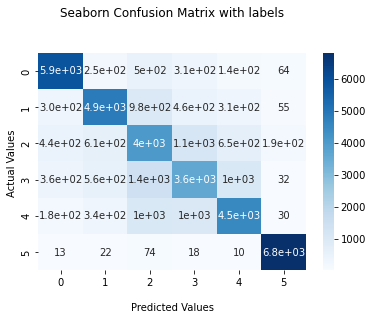

In [9]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

### Classification report

In [13]:
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(6)]))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7144
           1       0.73      0.70      0.71      6993
           2       0.50      0.57      0.53      7041
           3       0.55      0.51      0.53      7020
           4       0.68      0.64      0.66      7082
           5       0.95      0.98      0.96      6956

    accuracy                           0.70     42236
   macro avg       0.71      0.70      0.70     42236
weighted avg       0.71      0.70      0.70     42236



# Predict on non-SMOTE test set

In [20]:
X_nonsmote = pd.read_csv('xy_test_100features.csv', index_col=False)
y_nonsmote = X_nonsmote[["redlistCategory"]]
X_nonsmote = X_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [23]:
y_pred_nonsmote = decision_tree.predict(X_nonsmote)

## Get performance measures

### Confusion matrix

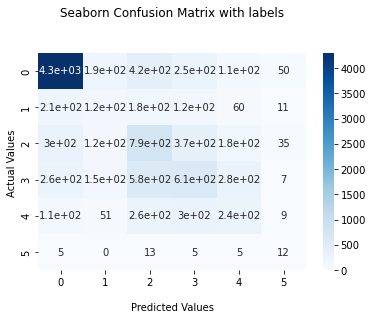

In [24]:
cf_matrix_nonsmote = confusion_matrix(y_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

### Classification report

In [25]:
print(classification_report(y_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(6)]))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5326
           1       0.19      0.17      0.18       706
           2       0.35      0.44      0.39      1800
           3       0.37      0.33      0.35      1889
           4       0.28      0.25      0.26       971
           5       0.10      0.30      0.15        40

    accuracy                           0.57     10732
   macro avg       0.35      0.38      0.36     10732
weighted avg       0.57      0.57      0.57     10732



# Decision Tree with non-SMOTE train set
For comparison of SMOTE effectiveness

In [26]:
X_train_nonsmote = pd.read_csv('xy_train_100features.csv', index_col=False)
y_train_nonsmote = X_train_nonsmote[["redlistCategory"]]
X_train_nonsmote = X_train_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

decision_tree_nonsmote = DecisionTreeClassifier(random_state=42)
decision_tree_nonsmote.fit(X_train_nonsmote, y_train_nonsmote)

y_pred_nonsmote2 = decision_tree_nonsmote.predict(X_nonsmote)

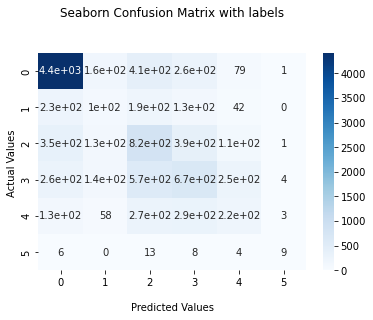

In [27]:
cf_matrix_nonsmote2 = confusion_matrix(y_nonsmote, y_pred_nonsmote2)
ax_nonsmote2 = sns.heatmap(cf_matrix_nonsmote2, annot=True, cmap='Blues')

ax_nonsmote2.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote2.set_xlabel('\nPredicted Values')
ax_nonsmote2.set_ylabel('Actual Values ')
plt.show()

In [28]:
print(classification_report(y_nonsmote, y_pred_nonsmote2, target_names=[str(i) for i in range(6)]))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      5326
           1       0.18      0.15      0.16       706
           2       0.36      0.46      0.40      1800
           3       0.38      0.35      0.37      1889
           4       0.32      0.23      0.27       971
           5       0.50      0.23      0.31        40

    accuracy                           0.58     10732
   macro avg       0.43      0.37      0.39     10732
weighted avg       0.58      0.58      0.58     10732

